ALY_6015_Winter_2020_assignment_3_B.SAITEJA

Time series Analysis using ARIMA for apple stock prices.
1) Load necessary packages
2) Load the dataset
3) Perform changes according to our requirment
4) Decompose the dataset
5) Check for stationarity, Usinf ADF test
6) Make the data set stationary using differencing and log method.
7) Again check for stationary using ADF test.
8) Fit an ARIMA model
9) Forecast the arima model and compare it with the expected value.
10) Fit the arima model with better parametres and forecast the best model.
11) Takeaways from the forecast.

In [0]:
# Load necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pyplot import plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [0]:
apl_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT2Gq5FNs1RKtetchpecOzB2xicav0_sBVachcGCmtybu1QjzKAOZeuGCnMXTBlmeunsPiDOQhZFxnm/pub?gid=1562913400&single=true&output=csv'
apl=pd.read_csv(apl_url)
apl

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


In [0]:
apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [0]:
apl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [0]:
apl.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
3018,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


Adjusting the time of the data using daterange and the freq is B which represents the Business days.

In [0]:
date=pd.date_range('2006-01-03','2017-12-29',freq='B')
apl['date']=pd.DataFrame(date)
apl=apl.set_index('date')

In [0]:
apl.head()

,Date,Open,High,Low,Close,Volume,Name
date,,,,,,,
2006-01-03,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Dropping the columns which are no longer useful for us to make the predictions.

In [0]:
apl.drop(['Date','Open','High','Volume','Name','Low'],axis=1,inplace=True)
apl.head()

,Close
date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


Plotting the given data, from the plot we can clearly say that it follows upward trend and has np constant mean and no constant variance so it said to be Non-stationary.

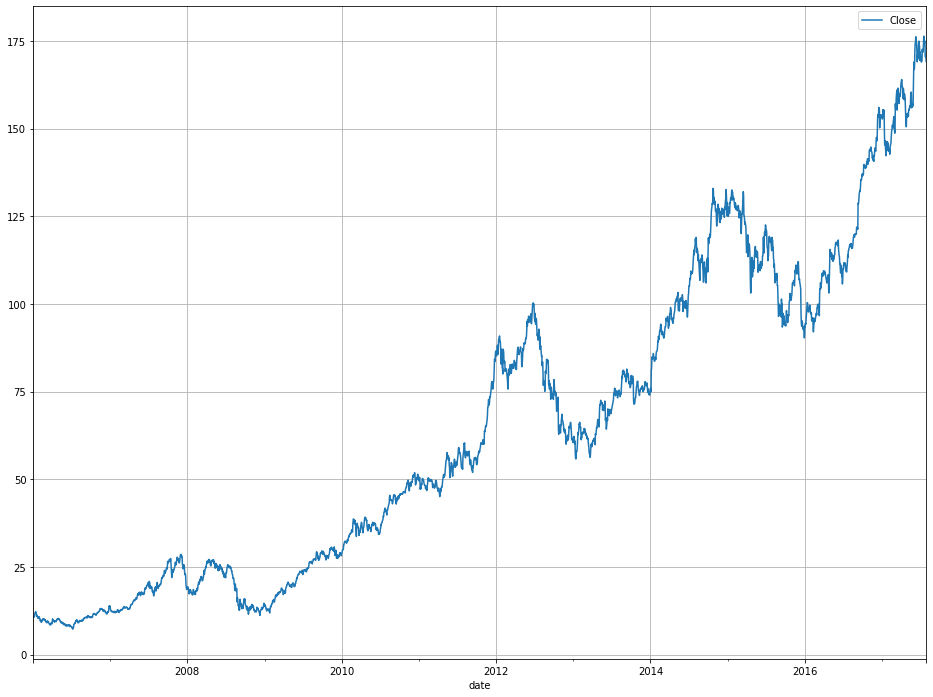

In [0]:
ax = apl.plot(figsize=(16,12))
plt.grid()

Decompose the model by using multiplicative model because seasonal variance increases over time.

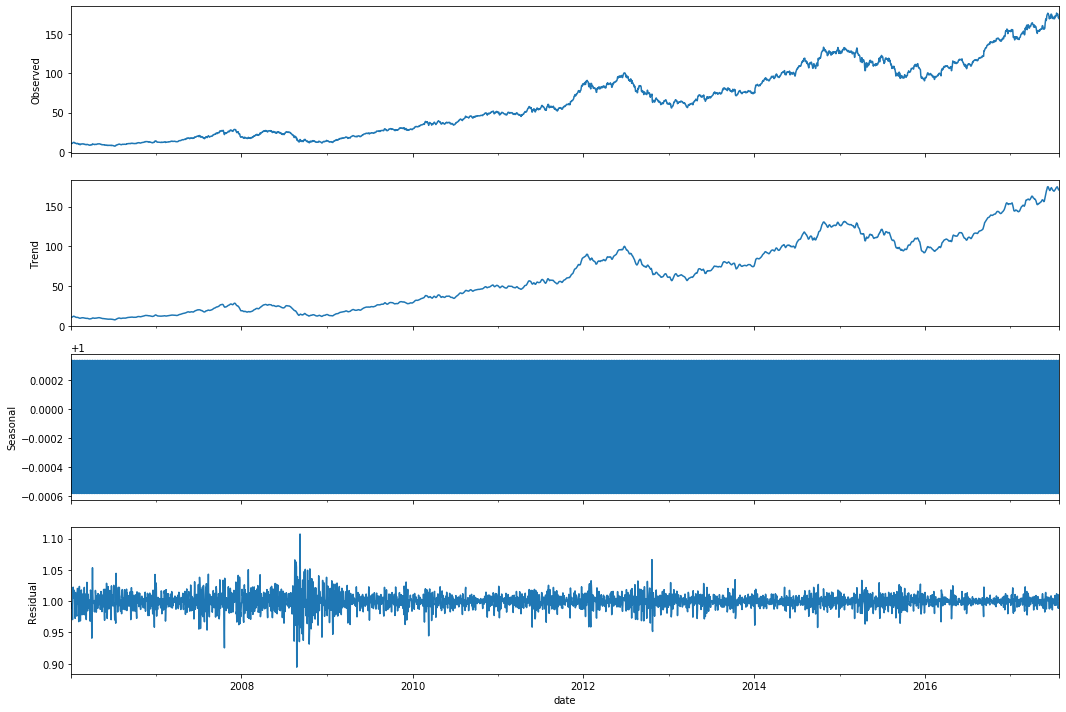

In [0]:
fig = sm.tsa.seasonal_decompose(apl.Close, model="multiplicative")
plt.rcParams["figure.figsize"] = (15,10)
figplot = fig.plot()
plt.show()

Checking for the stationarity in the given time series model using ADF test.

In [0]:


dftest = adfuller(apl.Close, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data {} stationary with {}% confidence".format(k, v, "is not" if v<dftest[0] else "is", 100-int(k[:-1])))

Test statistic = 0.552
P-value = 0.986
Critical values :
	1%: -3.4325345499510043 - The data is not stationary with 99% confidence
	5%: -2.8625051928165557 - The data is not stationary with 95% confidence
	10%: -2.5672837975912697 - The data is not stationary with 90% confidence


Performing the AdF test to check for stationarity and from the test it is evident that the given data is non-stationary.

Crated a copy for given data and applied the difference and log technique to stationarize the data.

In [0]:
df = apl.copy()
df['diff_data'] = (df['Close'] - df.Close.rolling(window=5).mean()) / df.Close.rolling(window=5).std()
df['logged_data'] = df['diff_data'] - df['diff_data'].shift(12)

Created a plot for original data and stationarized data.

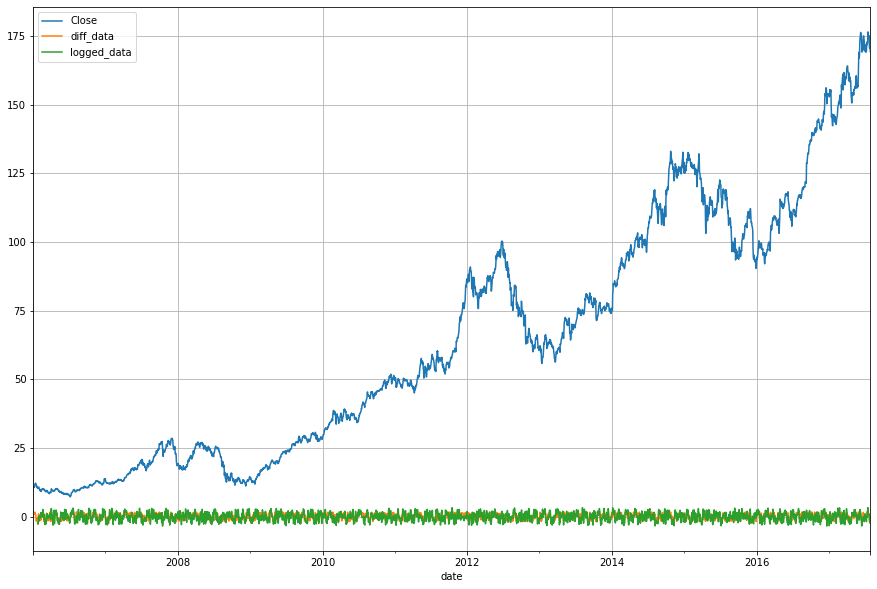

In [0]:
ax = df.plot(figsize=(15,10))
plt.grid()

After applying difference and log technique to stationarize data, we once again use ADF test to make sure the data is stationary.

In [0]:
dftest1 = adfuller(df.diff_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest1[0]))
print("P-value = {:.3f}".format(dftest1[1]))
print("Critical values :")
for k, v in dftest1[4].items():
    print("\t{}: {} - The data {} stationary with {}% confidence".format(k, v, "is not" if v<dftest1[0] else "is", 100-int(k[:-1])))
dftest2 = adfuller(df.logged_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest2[0]))
print("P-value = {:.3f}".format(dftest2[1]))
print("Critical values :")
for k, v in dftest2[4].items():
    print("\t{}: {} - The data {} stationary with {}% confidence".format(k, v, "is not" if v<dftest2[0] else "is", 100-int(k[:-1])))

Test statistic = -24.355
P-value = 0.000
Critical values :
	1%: -3.43252293552353 - The data is stationary with 99% confidence
	5%: -2.862500063122179 - The data is stationary with 95% confidence
	10%: -2.5672810666012356 - The data is stationary with 90% confidence
Test statistic = -15.332
P-value = 0.000
Critical values :
	1%: -3.4325477654888106 - The data is stationary with 99% confidence
	5%: -2.862511029642188 - The data is stationary with 95% confidence
	10%: -2.5672869050538965 - The data is stationary with 90% confidence


From the ADF test we can clearly confirm the data is stationary with 90,95,99% confidence.

Resampling the data monthly and converting it into a Frame and naming the columns.

In [0]:
apl_m=pd.DataFrame(apl.Close.resample('M').mean())
apl_m.tail()

,Close
date,
2017-03-31,157.755217
2017-04-30,158.606000
2017-05-31,156.971304
2017-06-30,172.253182
2017-07-31,171.891500


In [0]:
apl_m.columns=['Close']
apl_m.head()

,Close
date,
2006-01-31,11.099048
2006-02-28,9.886000
2006-03-31,9.054783
2006-04-30,9.726000
2006-05-31,9.319565


Importing pacf and acf plots from the statsmodel graphics to plot the Partical Autocorrelation plot and Autocorrelation plot.

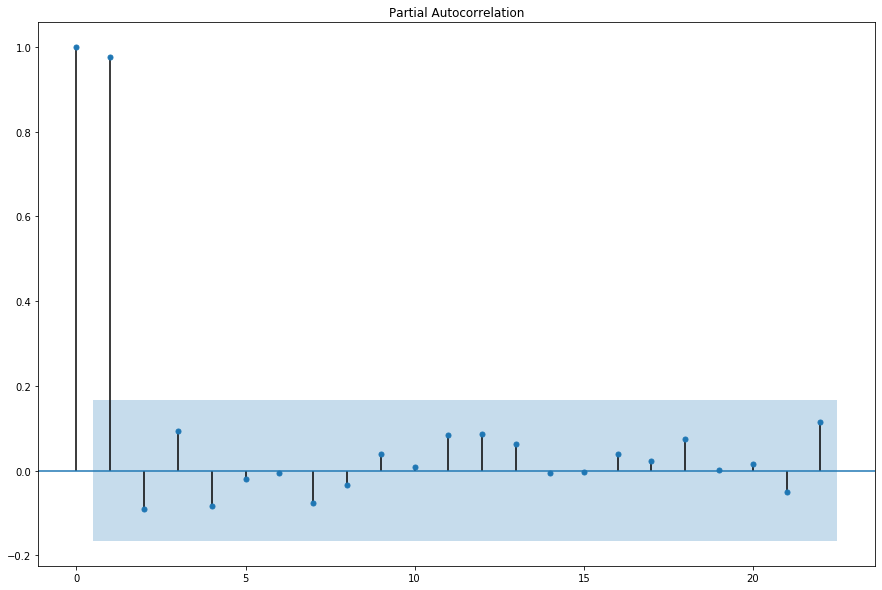

In [0]:

plot_pacf(apl_m)
plt.show()

From the Partial Autocorrelation plot it is clear that the value of q is between 2 and 3.

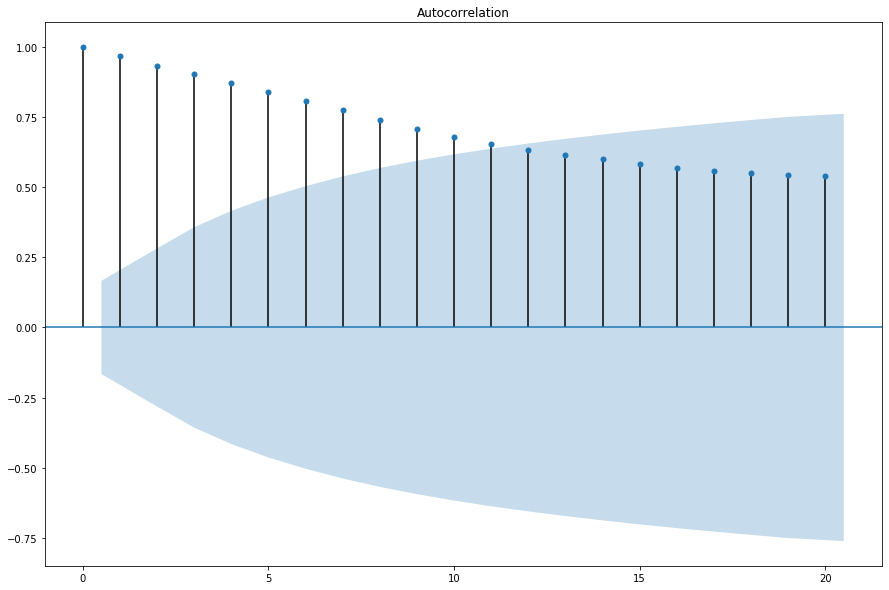

In [0]:
plot_acf(apl_m,lags=20)
plt.show()

From the aurocorrelation plot is it clear that the value of p is in between 10 and 13.

Now we have found the p,q,values and the value of d can be 1 or 2. Based on p,d,q, values we have to build our ARIMA model and predict the values.

The first ARIMA model is build by using 11,1,1 values for p,d,q and second ARIMA model is build by using 11,1,2 values for p,d,q.

In [0]:

model=ARIMA(apl_m.Close,order=(11,1,1))

Fitting the ARIMA model and evaluating the sumamry.

In [0]:
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  138
Model:                ARIMA(11, 1, 1)   Log Likelihood                -391.981
Method:                       css-mle   S.D. of innovations              4.085
Date:                Tue, 11 Feb 2020   AIC                            811.962
Time:                        17:49:22   BIC                            852.943
Sample:                    02-28-2006   HQIC                           828.616
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0686      0.073     14.551      0.000       0.925       1.213
ar.L1.D.Close      1.1647      0.085     13.634      0.000       0.997       1.332
ar.L2.D.Close     -0.3493      0.134

In [0]:
ar_coef= model_fit.arparams

Fitting another ARIMA model with different  parameters for P,d,q and elaborating the performance measures using summary function.

In [0]:
model_1=ARIMA(apl_m,order=(11,1,2))

In [0]:
model_fit_1=model_1.fit()
print(model_fit_1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  138
Model:                ARIMA(11, 1, 2)   Log Likelihood                -391.436
Method:                       css-mle   S.D. of innovations              4.091
Date:                Tue, 11 Feb 2020   AIC                            812.872
Time:                        17:49:47   BIC                            856.781
Sample:                    02-28-2006   HQIC                           830.715
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0548      0.125      8.453      0.000       0.810       1.299
ar.L1.D.Close      2.0741      0.130     16.006      0.000       1.820       2.328
ar.L2.D.Close     -1.4061      0.228

The performance of an ARIMA model can be best evaluated using the residual values and the variance, so we plotted the graph for various residual values about the zero.

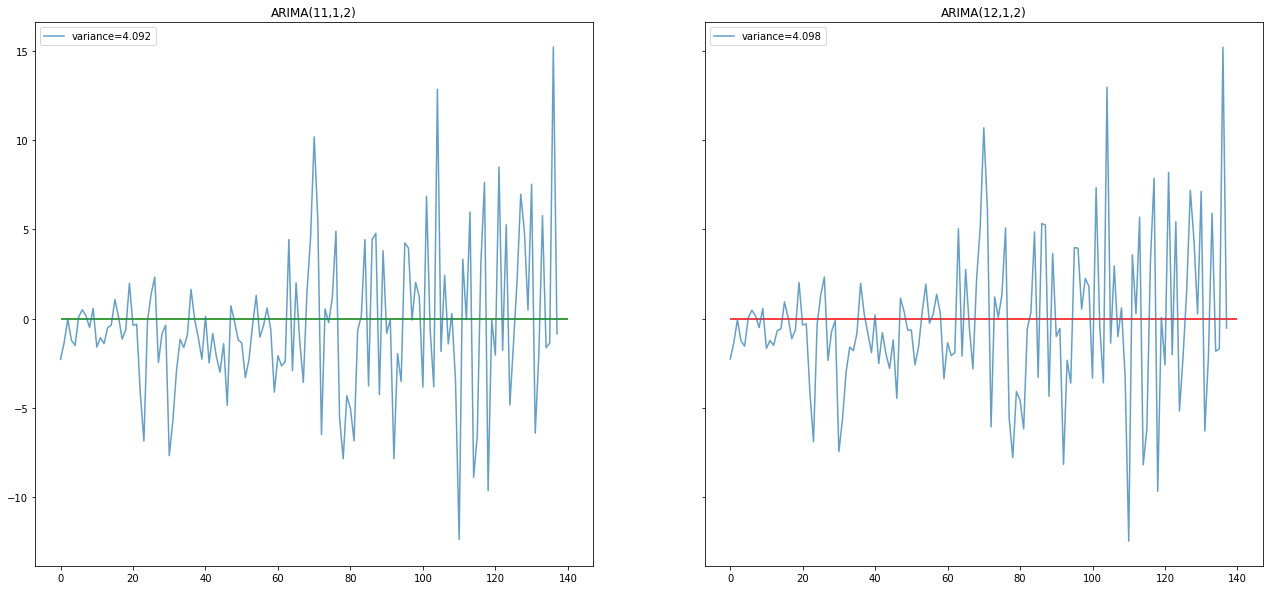

In [0]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(22, 10))
ax[0].plot(model_fit.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(model_fit.resid.values)));
ax[0].hlines(0, xmin=0, xmax=140, color='g');
ax[0].set_title("ARIMA(11,1,2)");
ax[0].legend(loc='upper left');

ax[1].plot(model_fit_1.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(model_fit_1.resid.values)));
ax[1].hlines(0, xmin=0, xmax=140, color='r');
ax[1].set_title("ARIMA(12,1,2)");
ax[1].legend(loc='upper left');

Below plot describes the kde plot for residuals which is clealy follows a normal distribution.

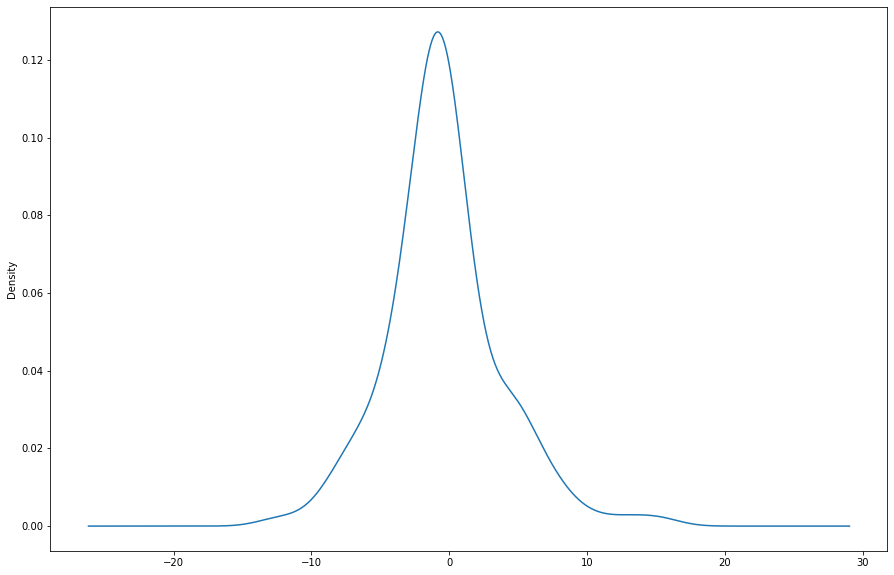

In [0]:
model_fit.resid.plot(kind='kde')
plt.show()

Now predicting the values for a time period of 2 years using already ARIMA model and plot the graph for predicted values with 95% accuracy.

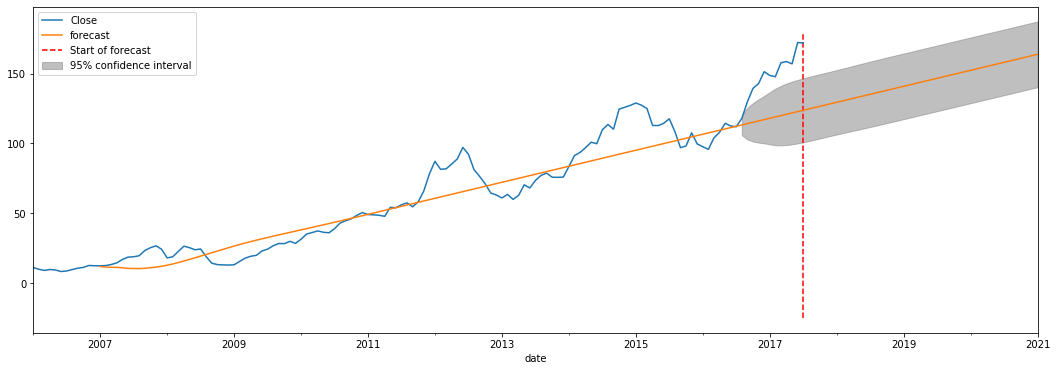

In [0]:
model = ARIMA(apl_m[:-12], (11,1,1))
mod_1112 = model.fit()

fig, ax = plt.subplots(figsize=(18, 6));
apl_m.index = pd.to_datetime(apl_m.index, format="%Y-%m");
apl_m.plot(ax=ax);
ax.vlines('2017-07-31', -25, 180, linestyle='--', color='r', label='Start of forecast');
mod_1112.plot_predict(start = '2007-01-31', end = '2021-01-31', dynamic = True, plot_insample=False, ax=ax);

predicting the values using ARIMA(11,1,2) model for 2 years with 95% confidence interval.

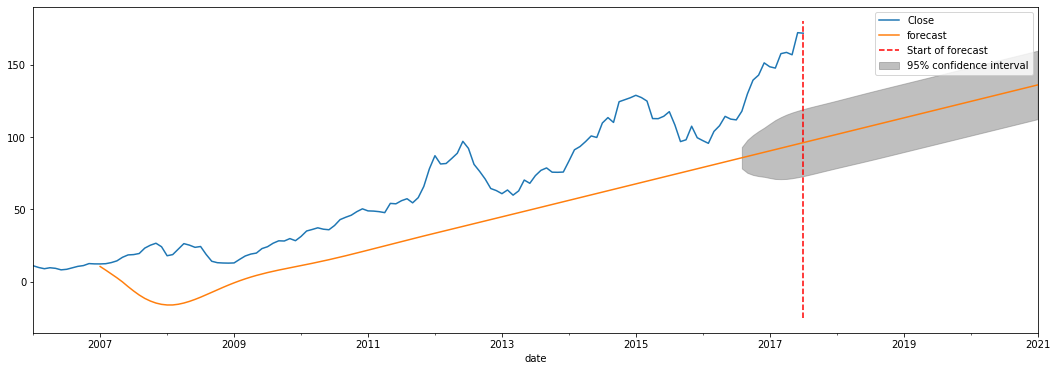

In [0]:
model = ARIMA(apl_m[:-12], (11,1,2))
mod_1112 = model.fit()

fig, ax = plt.subplots(figsize=(18, 6));
apl_m.index = pd.to_datetime(apl_m.index, format="%Y-%m");
apl_m.plot(ax=ax);
ax.vlines('2017-07-31', -25, 180, linestyle='--', color='r', label='Start of forecast');
mod_1112.plot_predict(start = '2007-01-31', end = '2021-01-31', dynamic = True, plot_insample=False, ax=ax);

Buildinf ARIMA models with various parameters. We already found using ACF and PACF plots that the values for p lies between 10 and 13 and the values for q lies in betweeen 2 and 3 and for the differencing term we use 1 or 2 order mostly. Building the models with various paramters and print the performance measures for various models.

In [0]:
for p in range(10,13):
  for d in range(1,2):
    for q in range(2,4):
      model_gen=ARIMA(apl_m,order=(p,d,q))
      model_gen_fit=model_gen.fit()
      print("")
      print("")
      print("ARIMA model with {}, {}, {} ".format(p,d,q))
      print(model_gen_fit.summary())



ARIMA model with 10, 1, 2 
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  138
Model:                ARIMA(10, 1, 2)   Log Likelihood                -391.385
Method:                       css-mle   S.D. of innovations              4.103
Date:                Tue, 11 Feb 2020   AIC                            810.769
Time:                        17:57:23   BIC                            851.751
Sample:                    02-28-2006   HQIC                           827.423
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0531      0.173      6.096      0.000       0.715       1.392
ar.L1.D.Close      0.1640      0.161      1.021      0.309      -0.151       0.479
ar.L2.D

From the above we found that ARIMA model with p value 11 and d value 1 and q value 3 performs most efficienlty when comopared with others. So using the ARIMA (11,1,3) model we built the forecast model to plot and predict the values for 2 future years and it is given below.

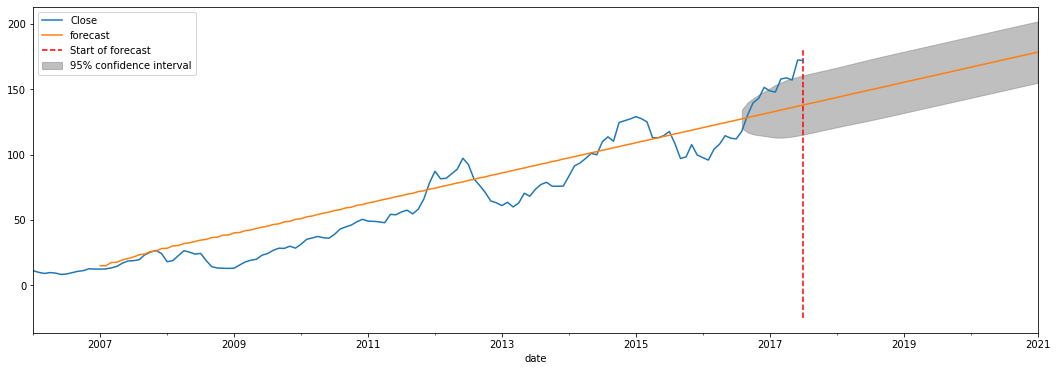

In [0]:
model = ARIMA(apl_m[:-12], (11,1,3))
mod_1112 = model.fit()

fig, ax = plt.subplots(figsize=(18, 6));
apl_m.index = pd.to_datetime(apl_m.index, format="%Y-%m");
apl_m.plot(ax=ax);
ax.vlines('2017-07-31', -25, 180, linestyle='--', color='r', label='Start of forecast');
mod_1112.plot_predict(start = '2007-01-31', end = '2021-01-31', dynamic = True, plot_insample=False, ax=ax);

Time series is a statistical technique that deals with time series data or trend analysis. ARIMA and SARIMA are the time series models used for forecasting. In this project we ARIMA model to forecast the apple stock price. The time series is a trend model with no stationarity so we need to make the time series stationary using differencing or logged version. ARIMA model helps to forecast the time series data based on p,d,q which are order of the AR model, order of differencing, and order of the MA model respectively. Using ARIMA we build a time series model which will forecast the predcited values based on the previous values of the data. From the forecast we found that the apple stock prices increased over time period and here using arima model we forecasted the apple stock prices for 2 years with 95% confidence interval.